<a href="https://colab.research.google.com/github/Mahmoudsamir10/Data-analysis-projects/blob/main/train_sign%20language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

In [1]:
import cv2
import os

def video_to_images(video_path, output_folder, image_prefix='frame', image_format='jpg'):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Read the first frame
    success, frame = cap.read()
    count = 0

    while success:
        # Save the frame as an image
        image_filename = f"{image_prefix}_{count:04d}.{image_format}"
        image_path = os.path.join(output_folder, image_filename)
        cv2.imwrite(image_path, frame)

        # Read the next frame
        success, frame = cap.read()
        count += 1

    # Release the video capture object
    cap.release()

if __name__ == "__main__":
    # Specify the path to the video file
    video_path = "/content/69529.mp4"

    # Specify the output folder for images
    output_folder = "/content/output"

    # Convert the video to images
    video_to_images(video_path, output_folder)


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# infer on a local image
print(model.predict("/content/output/frame_0007.jpg", confidence=40, overlap=30).json())

# visualize your prediction
#model.predict("/content/output/frame_0007.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [], 'image': {'width': '720', 'height': '400'}}


In [5]:
from roboflow import Roboflow
import os
import json

rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# Specify the path to the folder containing images
input_folder = "/content/output"

# Specify the output folder for predictions and labels
output_folder = "/content/output/result1"
os.makedirs(output_folder, exist_ok=True)

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Initialize an empty list to store frames with labels
frames_with_labels = []

# Loop through each image and perform inference
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels from the result
    predictions = result.get("predictions", [])
    labels = [label.get("label", "") for label in predictions]

    # Check if the frame contains labels
    if labels:
        # Save the image file name and labels to the list
        frames_with_labels.append({"image_file": image_file, "labels": labels})

# Save the frames with labels to a JSON file
output_json_path = os.path.join(output_folder, "frames_with_labels.json")
with open(output_json_path, 'w') as json_file:
    json.dump(frames_with_labels, json_file)

loading Roboflow workspace...
loading Roboflow project...


In [6]:
from roboflow import Roboflow
import os
import json

rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# Specify the path to the folder containing images
input_folder = "/content/output"

# Specify the output folder for predictions and labels
output_folder = "/content/output/result11"
os.makedirs(output_folder, exist_ok=True)

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Initialize an empty list to store frames with labels
frames_with_labels = []

# Loop through each image and perform inference
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Check if the frame contains labels
    if class_names:
        # Save the image file name and class names to the list
        frames_with_labels.append({"image_file": image_file, "class_names": class_names})

# Save the frames with labels to a JSON file
output_json_path = os.path.join(output_folder, "frames_with_labels.json")
with open(output_json_path, 'w') as json_file:
    json.dump(frames_with_labels, json_file)

loading Roboflow workspace...
loading Roboflow project...


In [7]:
from roboflow import Roboflow
import os
import json
from collections import Counter

rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# Specify the path to the folder containing images
input_folder = "/content/output"

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Initialize an empty list to store all class names
all_class_names = []

# Loop through each image and perform inference
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Add the class names to the list
    all_class_names.extend(class_names)

# Find the most frequent label
most_frequent_label, _ = Counter(all_class_names).most_common(1)[0]

# Print the most frequent label
print(f"The most frequent label is: {most_frequent_label}")

loading Roboflow workspace...
loading Roboflow project...
The most frequent label is: Expensive


In [8]:
import cv2
import os

def video_to_images(video_path, output_folder, image_prefix='frame', image_format='jpg'):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Read the first frame
    success, frame = cap.read()
    count = 0

    while success:
        # Save the frame as an image
        image_filename = f"{image_prefix}_{count:04d}.{image_format}"
        image_path = os.path.join(output_folder, image_filename)
        cv2.imwrite(image_path, frame)

        # Read the next frame
        success, frame = cap.read()
        count += 1

    # Release the video capture object
    cap.release()

if __name__ == "__main__":
    # Specify the path to the video file
    video_path = "/content/00583.mp4"

    # Specify the output folder for images
    output_folder = "/content/output/v2"

    # Convert the video to images
    video_to_images(video_path, output_folder)


loading Roboflow workspace...
loading Roboflow project...
label is: Talk


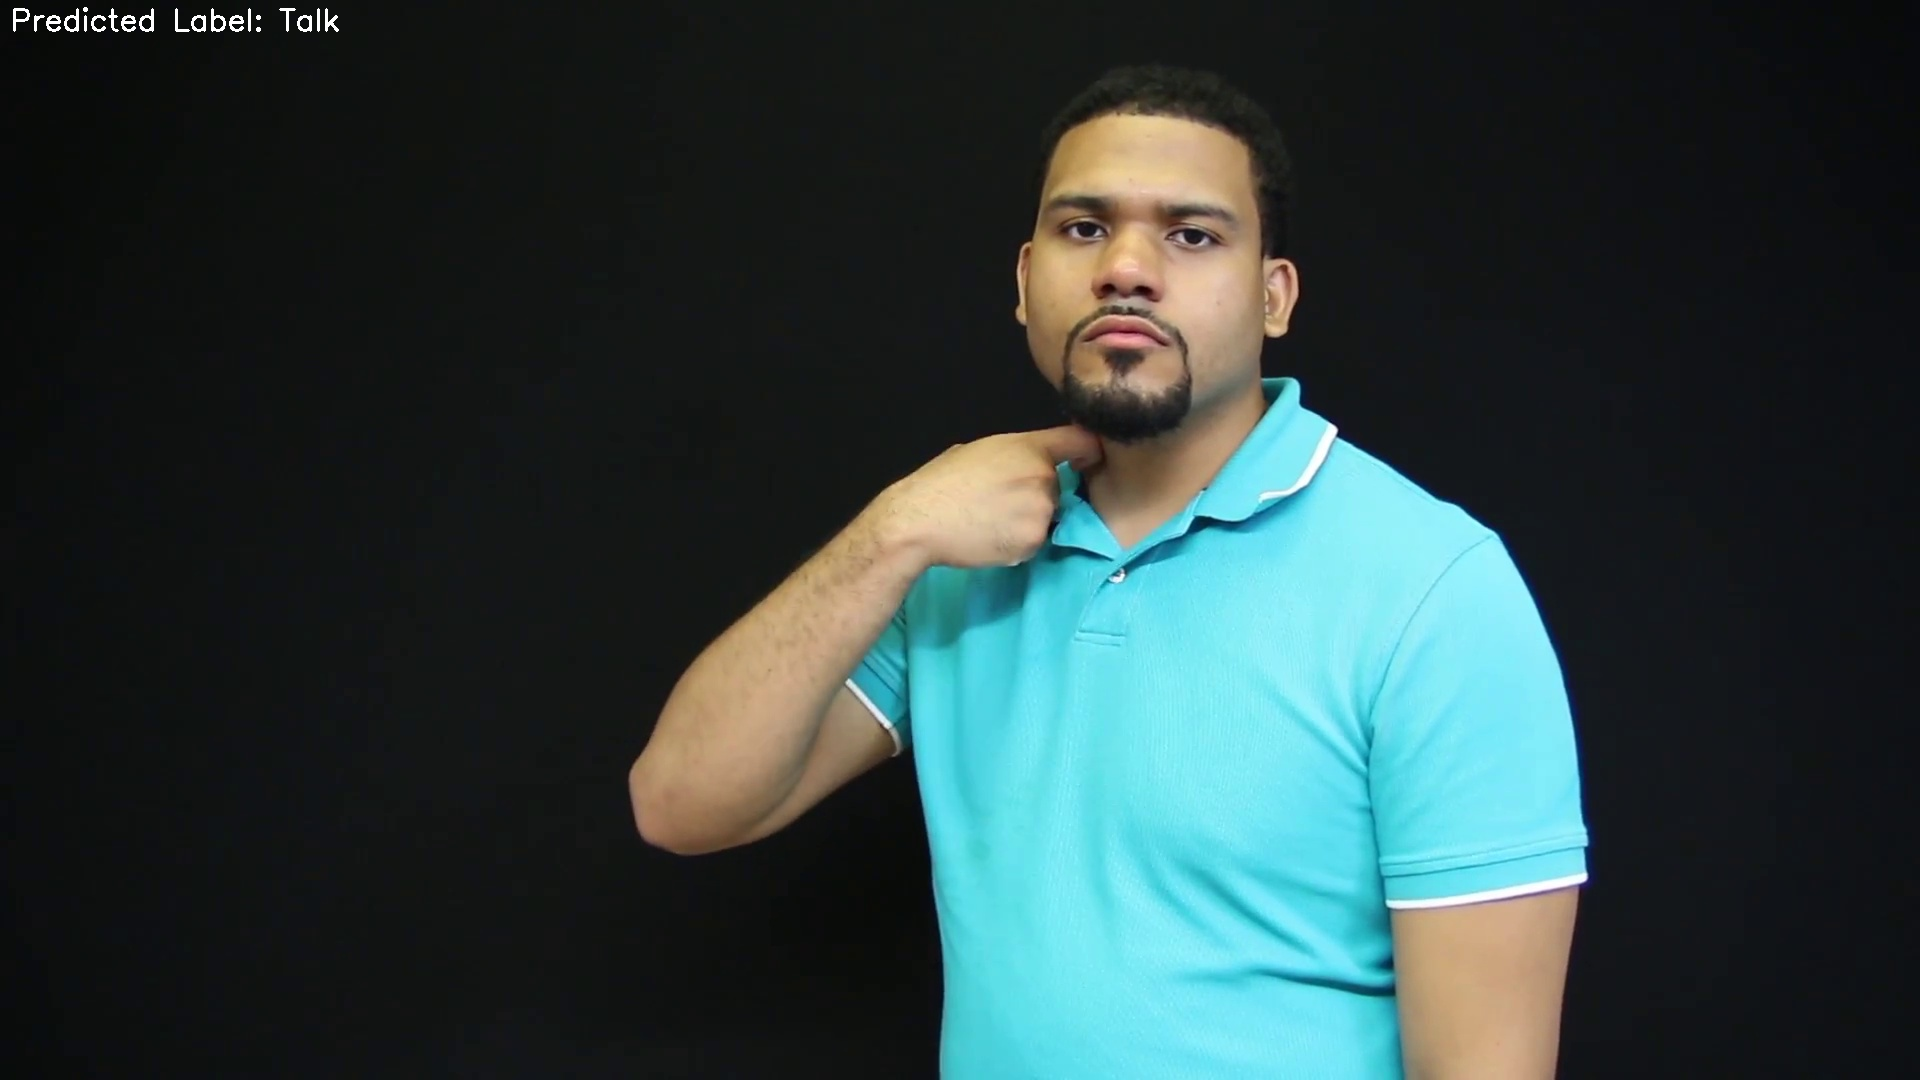

In [16]:
from roboflow import Roboflow
import os
import json
from collections import Counter

rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# Specify the path to the folder containing images
input_folder = "/content/output/v2"

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Initialize an empty list to store all class names
all_class_names = []

# Loop through each image and perform inference
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Add the class names to the list
    all_class_names.extend(class_names)

# Find the most frequent label
most_frequent_label, _ = Counter(all_class_names).most_common(1)[0]

# Print the most frequent label
print(f"label is: {most_frequent_label}")
# Loop through each image and display images with the most frequent label
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Check if the most frequent label is present in the current image
    if most_frequent_label in class_names:
        # Read the image using OpenCV
        image = cv2.imread(input_image_path)

        # Add text to the image
        text = f"Predicted Label: {most_frequent_label}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (255, 255, 255)  # White color
        thickness = 2
        position = (10, 30)
        cv2.putText(image, text, position, font, 1, color, thickness)

        # Display the image
cv2_imshow(image)

loading Roboflow workspace...
loading Roboflow project...
label is: Expensive


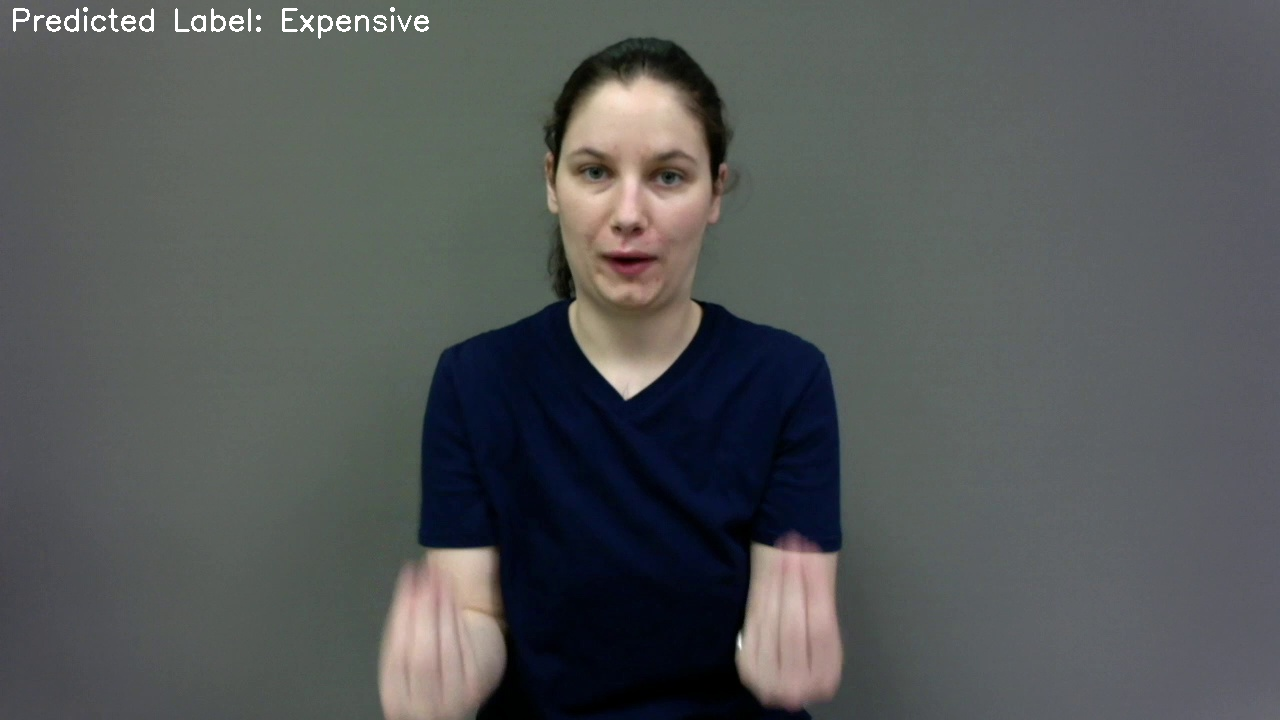

In [20]:
from roboflow import Roboflow
import os
import json
from collections import Counter

rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# Specify the path to the folder containing images
input_folder = "/content/output"

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Initialize an empty list to store all class names
all_class_names = []

# Loop through each image and perform inference
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Add the class names to the list
    all_class_names.extend(class_names)

# Find the most frequent label
most_frequent_label, _ = Counter(all_class_names).most_common(1)[0]

# Print the most frequent label
print(f"label is: {most_frequent_label}")
# Loop through each image and display images with the most frequent label
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Check if the most frequent label is present in the current image
    if most_frequent_label in class_names:
        # Read the image using OpenCV
        image = cv2.imread(input_image_path)

        # Add text to the image
        text = f"Predicted Label: {most_frequent_label}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (255, 255, 255)  # White color
        thickness = 2
        position = (10, 30)
        cv2.putText(image, text, position, font, 1, color, thickness)

        # Display the image
cv2_imshow(image)

In [ ]:
from roboflow import Roboflow
import os
import json
from collections import Counter

rf = Roboflow(api_key="gG8aylni1pP5mqklZGT2")
project = rf.workspace().project("i3d")
model = project.version(3).model

# Specify the path to the folder containing images
input_folder = "/content/output"

# Get a list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Initialize an empty list to store all class names
all_class_names = []

# Loop through each image and perform inference
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Add the class names to the list
    all_class_names.extend(class_names)

# Find the most frequent label
most_frequent_label, _ = Counter(all_class_names).most_common(1)[0]

# Print the most frequent label
print(f"The most frequent label is: {most_frequent_label}")
# Loop through each image and display images with the most frequent label
for image_file in image_files:
    # Construct the full path to the input image
    input_image_path = os.path.join(input_folder, image_file)

    # Perform inference on the image
    result = model.predict(input_image_path, confidence=40, overlap=30).json()

    # Extract the labels (class names) from the result
    predictions = result.get("predictions", [])
    class_names = [prediction.get("class", "") for prediction in predictions]

    # Check if the most frequent label is present in the current image
    if most_frequent_label in class_names:
        # Read the image using OpenCV
        image = cv2.imread(input_image_path)

        # Add text to the image
        text = f"Predicted Label: {most_frequent_label}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (255, 255, 255)  # White color
        thickness = 2
        position = (10, 30)
        cv2.putText(image, text, position, font, 1, color, thickness)

        # Display the image
cv2_imshow(image)